## Assignment: Homework 3 M Session
## Name: Kiran Venkata Palla
## Net Id: kvp246

#Assignment 1 : Distributions

Following the ipython notebook https://github.com/fedhere/PUI2015_fbianco/blob/master/HW3/assignment1_distributions_instructions.ipynb

1. GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 6 different distributions (600 samples in total), all with the same population mean. 
Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 2 more of your choice.                                       

2. For each sample plot the sample mean against the sample size N (if you want you can do it with the sample standard deviation as well). 
Describe the behavior you see in the plots - do they look as you expected? why?

3. PLOT the distributions of all sample means (together for all distributions). 
Mandatory  - plot is as a histogram, 
Optional - plot it  in any other way you think is convincing

Optional: FIT a gaussian to the distribution of means             
 e.g. how to fit function to data in numpy:
http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html
http://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python


In [2]:
# Importing required libraries
from __future__ import print_function
__author__= 'kvp246'

%pylab inline
import matplotlib.pylab as plt
import numpy as np
import urllib2
import json
from scipy.stats import norm

# Using the matplotlib customizing file
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# Creating an empty dictionary with distribution names as keys 
distributionsList = ['normal', 'chisquare', 'binomial', 'poisson', 'laplace', 'rayleigh']
distributions = {x:{} for x in distributionsList} # Using dictionary comprehensions

# Generating 100 random samples between 10 and 2000 with different sizes 
i = 1
while i <= 99:
    mysize = np.random.randint(10, 2000, 100)
    i = len(set(mysize))

print ("Number of samples:", len(mysize))

# Setting the mean value to 100
mymean = 100

# Generating random values across 6 different distributions: normal, chisquare, binomial, poisson, laplace, rayleigh
for n in mysize:
    distributions['normal'][n] = np.random.normal(mymean, 0.1, n)
    distributions['chisquare'][n] = np.random.chisquare(mymean, n)
    distributions['binomial'][n] = np.random.binomial((mymean/0.1), 0.1, n)
    distributions['poisson'][n] = np.random.poisson(mymean, n)
    distributions['laplace'][n] = np.random.laplace(mymean, 4, n)
    distributions['rayleigh'][n] = np.random.rayleigh(mymean*(np.sqrt(2/pi)), n)

Number of samples: 100


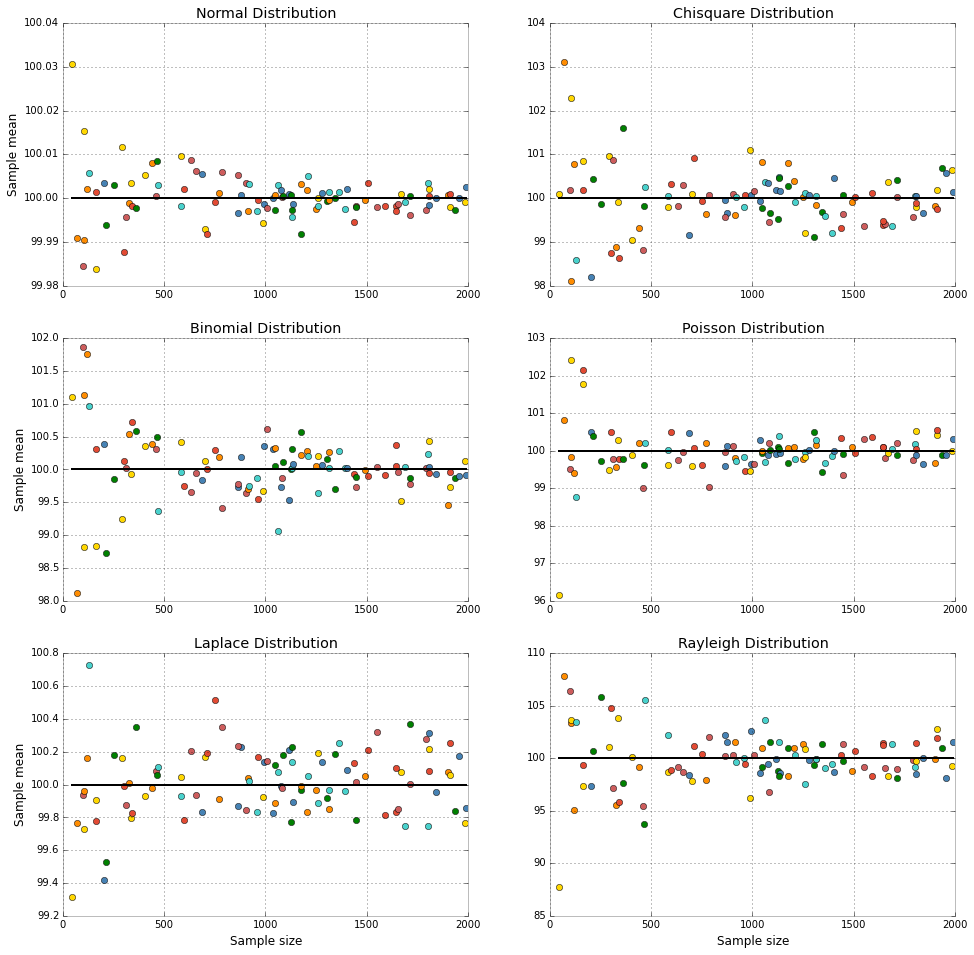

In [4]:
# Plotting the sample mean values across sample sizes for all the distributions

# Setting the plot figure size and subplot positions
fig_mu_N = plt.figure(figsize=(16,16))
axnormal_mu_n = fig_mu_N.add_subplot(3,2,1)
axchisquare_mu_n = fig_mu_N.add_subplot(3,2,2)
axbinomial_mu_n = fig_mu_N.add_subplot(3,2,3)
axpoisson_mu_n = fig_mu_N.add_subplot(3,2,4)
axlaplace_mu_n = fig_mu_N.add_subplot(3,2,5)
axrayleigh_mu_n = fig_mu_N.add_subplot(3,2,6)

# Generating the normal distribution plot of sample mean vs. sample size
for nn in distributions['normal']:
    axnormal_mu_n.plot(nn, distributions['normal'][nn].mean(), 'o')
    axnormal_mu_n.ticklabel_format(useOffset=False)
    axnormal_mu_n.set_title("Normal Distribution")
    axnormal_mu_n.set_ylabel("Sample mean")
    axnormal_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

# Generating the chisquare distribution plot of sample mean vs. sample size
for nn in distributions['chisquare']:
    axchisquare_mu_n.plot(nn, distributions['chisquare'][nn].mean(), 'o')
    axchisquare_mu_n.ticklabel_format(useOffset=False)
    axchisquare_mu_n.set_title("Chisquare Distribution")
    axchisquare_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

# Generating the binomial distribution plot of sample mean vs. sample size
for nn in distributions['binomial']:
    axbinomial_mu_n.plot(nn, distributions['binomial'][nn].mean(), 'o')
    axbinomial_mu_n.ticklabel_format(useOffset=False)
    axbinomial_mu_n.set_title("Binomial Distribution")
    axbinomial_mu_n.set_ylabel("Sample mean")
    axbinomial_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')
    
# Generating the poisson distribution plot of sample mean vs. sample size
for nn in distributions['poisson']:
    axpoisson_mu_n.plot(nn, distributions['poisson'][nn].mean(), 'o')
    axpoisson_mu_n.ticklabel_format(useOffset=False)
    axpoisson_mu_n.set_title("Poisson Distribution")
    axpoisson_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

# Generating the laplace distribution plot of sample mean vs. sample size
for nn in distributions['laplace']:
    axlaplace_mu_n.plot(nn, distributions['laplace'][nn].mean(), 'o')
    axlaplace_mu_n.ticklabel_format(useOffset=False)
    axlaplace_mu_n.set_title("Laplace Distribution")
    axlaplace_mu_n.set_xlabel("Sample size")
    axlaplace_mu_n.set_ylabel("Sample mean")
    axlaplace_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

# Generating the rayliegh distribution plot of sample mean vs. sample size
for nn in distributions['rayleigh']:
    axrayleigh_mu_n.plot(nn, distributions['rayleigh'][nn].mean(), 'o')
    axrayleigh_mu_n.ticklabel_format(useOffset=False)
    axrayleigh_mu_n.set_title("Rayleigh Distribution")
    axrayleigh_mu_n.set_xlabel("Sample size")
    axrayleigh_mu_n.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')

### Observations from the sample mean plots
One of the initial conditions we have used for selecting distribution observations is based on fixed mean value i.e. 100. From the above sample mean vs sample size plots for all the distributions we notice that the variation in sample mean values would tend to decrease with increase in sample sizes. This trend is consistently observed in all the distribution plots and is consistent with the law of large numbers that states as the sample size increases the sample mean will approach the population mean.

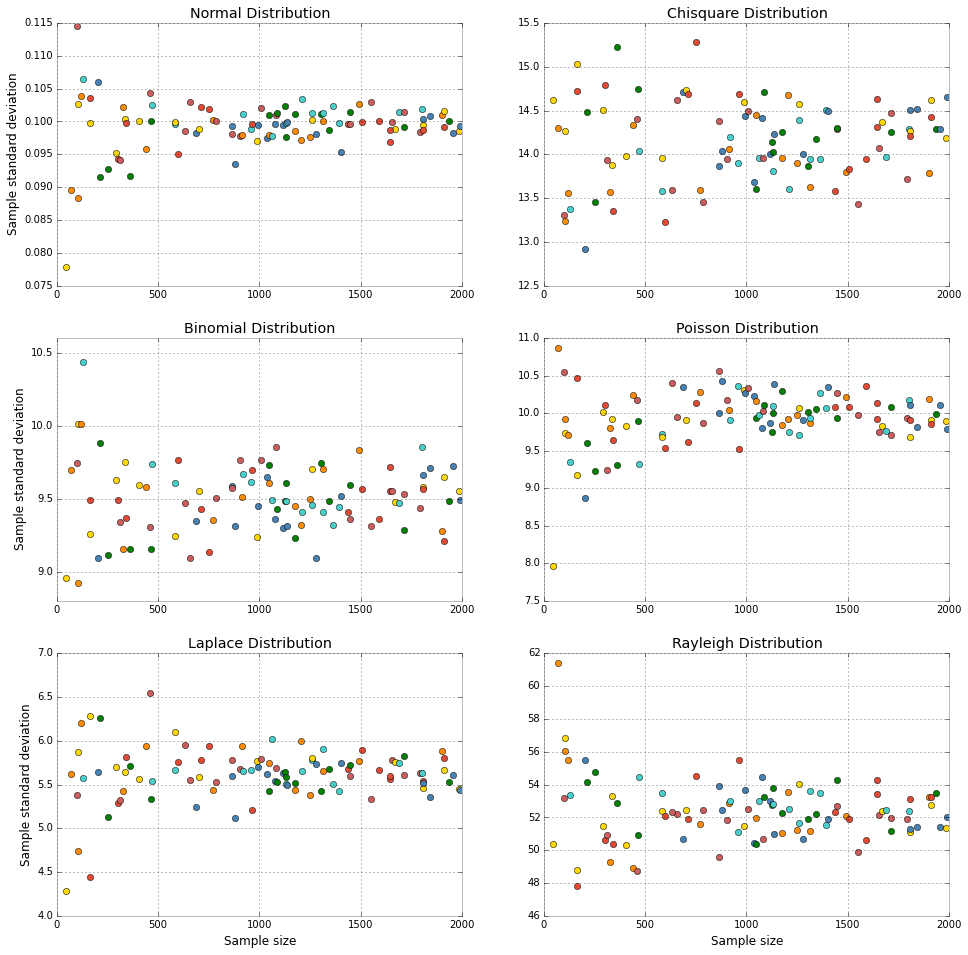

In [5]:
# Plotting the sample standard deviation values across sample sizes for all the distributions

# Setting the plot figure size and subplot positions
fig_mu_N = plt.figure(figsize=(16,16))
axnormal_mu_n = fig_mu_N.add_subplot(3,2,1)
axchisquare_mu_n = fig_mu_N.add_subplot(3,2,2)
axbinomial_mu_n = fig_mu_N.add_subplot(3,2,3)
axpoisson_mu_n = fig_mu_N.add_subplot(3,2,4)
axlaplace_mu_n = fig_mu_N.add_subplot(3,2,5)
axrayleigh_mu_n = fig_mu_N.add_subplot(3,2,6)

# Generating the normal distribution plot of sample standard deviation vs. sample size
for nn in distributions['normal']:
    axnormal_mu_n.plot(nn, distributions['normal'][nn].std(), 'o')
    axnormal_mu_n.ticklabel_format(useOffset=False)
    axnormal_mu_n.set_title("Normal Distribution")
    axnormal_mu_n.set_ylabel("Sample standard deviation")

# Generating the chisquare distribution plot of sample standard deviation vs. sample size
for nn in distributions['chisquare']:
    axchisquare_mu_n.plot(nn, distributions['chisquare'][nn].std(), 'o')
    axchisquare_mu_n.ticklabel_format(useOffset=False)
    axchisquare_mu_n.set_title("Chisquare Distribution")

# Generating the binomial distribution plot of sample standard deviation vs. sample size
for nn in distributions['binomial']:
    axbinomial_mu_n.plot(nn, distributions['binomial'][nn].std(), 'o')
    axbinomial_mu_n.ticklabel_format(useOffset=False)
    axbinomial_mu_n.set_title("Binomial Distribution")
    axbinomial_mu_n.set_ylabel("Sample standard deviation")
    
# Generating the poisson distribution plot of sample standard deviation vs. sample size
for nn in distributions['poisson']:
    axpoisson_mu_n.plot(nn, distributions['poisson'][nn].std(), 'o')
    axpoisson_mu_n.ticklabel_format(useOffset=False)
    axpoisson_mu_n.set_title("Poisson Distribution")

# Generating the laplace distribution plot of sample standard deviation vs. sample size
for nn in distributions['laplace']:
    axlaplace_mu_n.plot(nn, distributions['laplace'][nn].std(), 'o')
    axlaplace_mu_n.ticklabel_format(useOffset=False)
    axlaplace_mu_n.set_title("Laplace Distribution")
    axlaplace_mu_n.set_xlabel("Sample size")
    axlaplace_mu_n.set_ylabel("Sample standard deviation")

# Generating the rayliegh distribution plot of sample standard deviation vs. sample size
for nn in distributions['rayleigh']:
    axrayleigh_mu_n.plot(nn, distributions['rayleigh'][nn].std(), 'o')
    axrayleigh_mu_n.ticklabel_format(useOffset=False)
    axrayleigh_mu_n.set_title("Rayleigh Distribution")
    axrayleigh_mu_n.set_xlabel("Sample size")

Total number of sample means from all distributions: 600


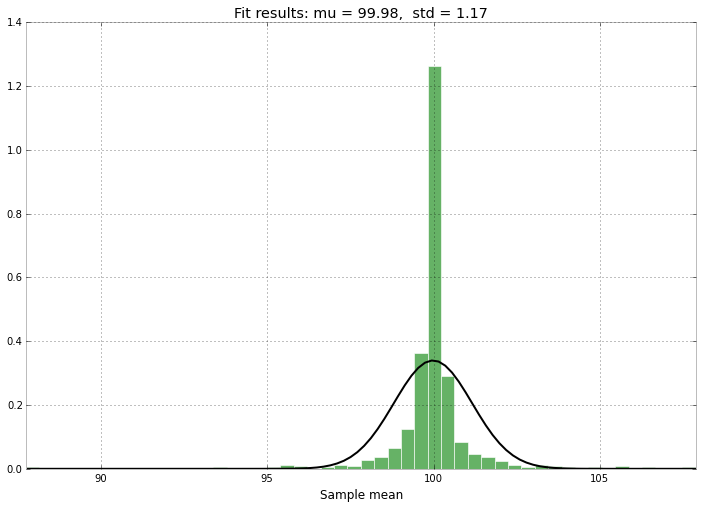

In [6]:
# Plotting sample means of all the distributions in a single plot
alldistMeans = []

for distribution in distributions:
    for nn in distributions[distribution]:
        alldistMeans.append(distributions[distribution][nn].mean())
        
print("Total number of sample means from all distributions:", len(alldistMeans))

# Plotting histogram using output from alldistMeans
plt.figure(figsize=(12,8))
mu, std = norm.fit(alldistMeans)
plt.hist(alldistMeans, bins=50, normed=True, alpha=0.6, color='g')
plt.xlim(min(alldistMeans), max(alldistMeans))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Sample mean')